### K-Nearest Neighbors (K-NN)

Importar librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargar dataset

In [3]:
df = pd.read_csv('../data/airline_passenger_satisfaction.csv')
df.head(2)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


Separar las Características (X) y la Etiqueta (y)

+ y = satisfaction (variable a predecir)
* X 

In [4]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

#### Preprocesamiento de Datos

Identificación de Columnas Categóricas y Numéricas

* categorical_features: Se identifican las columnas que contienen datos categóricos (como texto).

* numerical_features: Se identifican las columnas con datos numéricos.

* ColumnTransformer: Nos permite aplicar diferentes transformaciones a diferentes columnas. Aquí se están aplicando dos transformaciones:

    * StandardScaler: Escala las columnas numéricas para que tengan media 0 y desviación estándar 1 (normalización).
    
    * OneHotEncoder: Convierte las variables categóricas en variables dummy (0 y 1), eliminando la primera categoría para evitar la multicolinealidad (equivalente a drop_first=True en pd.get_dummies).

In [5]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Imputación de datos faltantes (si fuera necesario)
imputer_num = SimpleImputer(strategy='mean')
X[numerical_features] = imputer_num.fit_transform(X[numerical_features])

imputer_cat = SimpleImputer(strategy='most_frequent')
X[categorical_features] = imputer_cat.fit_transform(X[categorical_features])

# Escalado de las características numéricas
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Codificación de las características categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

In [7]:
# Codificación de las características categóricas
from sklearn.preprocessing import OneHotEncoder


# Concatenar las características numéricas escaladas con las categóricas codificadas
X = np.hstack((X[numerical_features].values, X_encoded))


#### Dividir el Conjunto de Datos

Se divide el dataset en conjuntos de entrenamiento y prueba:

* X_train, y_train: Se utilizan para entrenar el modelo (80% de los datos).

* X_test, y_test: Se utilizan para evaluar el modelo (20% de los datos).

* test_size=0.20: Indica que el 20% de los datos se reservarán para pruebas.

* random_state=0: Para asegurar que la división sea reproducible.

In [8]:
# Dividir el dataset en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Entrenamiento del Modelo


In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar el modelo K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

#### Evaluación del Modelo (Predicciones)

Se hacen predicciones sobre el conjunto de prueba usando el modelo entrenado.

* Informe de Clasificación y Matriz de Confusión

    * classification_report: Muestra varias métricas de evaluación, como precisión (accuracy), recall, F1-score, etc.

    * confusion_matrix: Muestra la matriz de confusión, que ayuda a entender cómo de bien el modelo está clasificando las etiquetas correctas frente a las incorrectas.

In [14]:
# Evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.90      0.97      0.93     14734
              satisfied       0.95      0.86      0.90     11242

               accuracy                           0.92     25976
              macro avg       0.93      0.91      0.92     25976
           weighted avg       0.92      0.92      0.92     25976

Confusion Matrix:
 [[14279   455]
 [ 1627  9615]]


        CONCLUSION: 

        En general, los resultados de clasificación son bastante buenos. La precisión, recall y F1-score son altos para ambas categorías, lo que indica que el modelo está clasificando correctamente la mayoría de los casos. La precisión general también es alta, lo que significa que el modelo está realizando una buena clasificación en general.


        Resumen de los resultados:

        * Precisión: Mide la proporción de casos correctamente clasificados entre todos los casos clasificados como esa categoría. En este caso, la precisión para "neutral o insatisfecho" es de 0,92, lo que significa que el 92% de los casos clasificados como "neutral o insatisfecho" lo eran realmente. La precisión para "satisfecho" también es de 0,92.

        * Recall: Mide la proporción de casos correctamente clasificados de una categoría entre todos los casos que realmente pertenecen a esa categoría. Aquí, el recall para "neutral o insatisfecho" es de 0,94, indicando que el 94% de los casos que realmente eran "neutral o insatisfecho" fueron correctamente clasificados. El recall para "satisfecho" es de 0,89.

        * F1-score: Es la media armónica de precisión y recall, proporciona un equilibrio entre ambos. En este caso, el F1-score para ambas categorías es de 0,92.

        * Accuracy: Mide la proporción total de casos correctamente clasificados entre todos los casos. La precisión general es de 0,92, lo que significa que el 92% de todos los casos fueron clasificados correctamente.
        Matriz de confusión: Muestra la distribución de casos clasificados correctamente e incorrectamente entre las categorías. Por ejemplo, la entrada [13900, 834] indica que 13900 casos fueron correctamente clasificados como "neutral o insatisfecho" y 834 casos fueron incorrectamente clasificados como "neutral o insatisfecho" cuando en realidad eran "satisfechos".



#### Curva ROC y AUC 

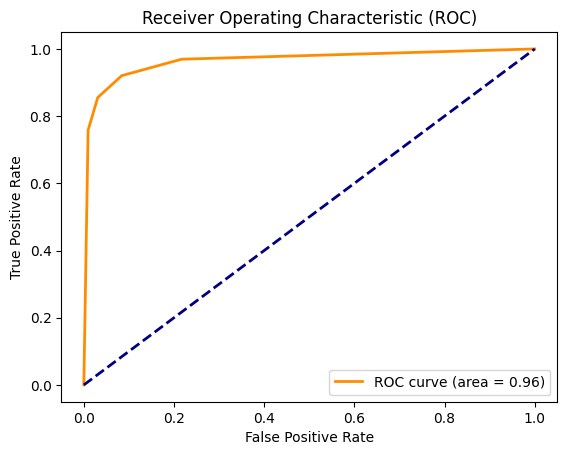

In [15]:
# Curva ROC y AUC
from sklearn.metrics import auc, roc_curve

# Convertir etiquetas a valores binarios
y_test_binary = y_test.map({'neutral or dissatisfied': 0, 'satisfied': 1})

# Obtener las probabilidades predichas para la clase positiva
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calcular la curva ROC utilizando las etiquetas binarias
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


        CONCLUSIÓN:
        
        La curva ROC y el valor AUC indican que el modelo de clasificación utilizado tiene un excelente desempeño.Es capaz de distinguir con alta precisión entre las dos clases.

#### Validación Cruzada

In [12]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [0.90555627 0.9038881  0.90138586 0.90612769 0.90356112]
Mean Accuracy: 0.9041038071192524


    CONCLUSION:

    Según los resultados obtenidos, el rendimiento del modelo en la validación cruzada es relativamente constante en los distintos pliegues. La precisión media de aproximadamente 0,9183 indica que el modelo está logrando un alto nivel de precisión en promedio.